# <Center>  Procesos Fraccionarios Lévy-Ornstein–Uhlenbeck
<p align="center"><i>Autores: Jerónimo Osorio y Alfonso Fierro</i></p>


## Introducción

En el estudio de los procesos estocásticos, los modelos fraccionarios son esenciales para capturar la memoria a largo plazo y la dependencia temporal observada en muchos fenómenos reales. Un proceso de Lévy-Ornstein-Uhlenbeck fraccionario (FLOUP)  proporciona una herramienta avanzada para modelar sistemas donde los eventos pasados influyen significativamente en el futuro.

El FLOUP se define como un proceso de Lévy modificado por un operador fraccionario, introduciendo una estructura de memoria a largo plazo. Esto permite una modelización más precisa de fenómenos en los que los eventos raros y las dependencias prolongadas son cruciales, algo que los modelos tradicionales no logran captar adecuadamente.

En este trabajo, implementamos y simulamos un proceso de Lévy fraccionario, comenzando con un proceso de Poisson compensado y construyendo a partir de este el proceso fraccionario. Posteriormente, aplicamos este proceso en una ecuación diferencial estocástica (SDE) para analizar su comportamiento. Nuestro objetivo es proporcionar una guía clara para replicar estos resultados, contribuyendo al avance en la modelización estocástica y sus aplicaciones en finanzas, física y otras disciplinas.


## Metodología

En este trabajo, abordamos la simulación y análisis de procesos de Lévy, procesos de Lévy fraccionarios y procesos de Lévy fraccionarios Ornstein-Uhlenbeck (FLOUP). A continuación, se describen brevemente cada uno de estos procesos y los métodos empleados para su implementación en Python.

### Procesos de Lévy

Los procesos de Lévy son una clase de procesos estocásticos que generalizan el movimiento Browniano y el proceso de Poisson. Se caracterizan por tener incrementos independientes y estacionarios.

1. Tiene incrementos independientes del pasado, es decir, $X_t - X_s$ es independiente de la filtración $\mathcal{F}_s$, donde $0 \leq s < t < \infty$.
2. Tiene incrementos estacionarios, es decir, $X_t - X_s$ tiene la misma distribución que $X_{t-s}$ para $0 \leq s < t < \infty$.
3. Es continuo en probabilidad, es decir, $\lim_{t \to s} X_t = X_s$, donde el límite se toma en probabilidad.

Dados tres procesos de Lévy independientes, que están definidos en el mismo espacio de probabilidad:

1. $X^{(1)}$ es un movimiento browniano con arrastre.
2. $X^{(2)}$ es un proceso de Poisson compuesto.
3. $X^{(3)}$ es una martingala de salto puro que casi con seguridad tiene una cantidad numerable de saltos en un intervalo finito.

El proceso definido por $X = X^{(1)} + X^{(2)} + X^{(3)}$ es entonces un proceso de Lévy.

$$ X_t = \mu t + \sigma B_t + J_t $$

donde $\mu$ es un parámetro de deriva, $\sigma B_t $ es un término de difusión con $B_t$ siendo un movimiento Browniano, y $J_t $ representa el componente de salto.


### Procesos de Lévy Fraccionarios

Un proceso de Lévy fraccionario introduce una estructura de memoria a largo plazo al modificar el proceso de Lévy mediante un operador fraccionario. Este tipo de proceso se define usando la integral fraccionaria de Riemann-Liouville:

$$ L_t^d = \frac{1}{\Gamma(d+1)} \int_{-\infty}^{+\infty} [(t-s)^d_{+} - (-s)^{d}_{+}]dL_s $$

donde $d$ es el parámetro fraccionario, $\Gamma$ es la función gamma y $L_s$ es el proceso de Lévy subyacente.

Por teorema, los procesos de Levy se pueden expresar con una integral de Riemann. Esta reopresentación será muy útil para nuestra implementación Computacional

$$L_t^d = \frac{1}{\Gamma(d)}\int_{\mathbb{R}}[(t-s)^d_{+} - (-s)^{d}_{+}]L_sds$$

### Procesos FLOUP

\textbf{Definición 3.3.} Sea \(L^d\) un FLP, \(d \in \left(0, \frac{1}{2}\right)\) y \(\lambda > 0\). Entonces
\[
L_t^{d, \lambda} := \int_{-\infty}^{t} e^{-\lambda (t-s)} \, dL_s^d, \quad t \in \mathbb{R},
\]
se llama un FLOUP.
### Integrales de Riemann-Stieltjes
Para las funciones $f, h:[a, b] \mapsto \mathbb{R}$, tomamos el límite de
$$
S(f, g, \kappa, \rho):=\sum_{i=1}^n f\left(y_i\right)\left[h\left(x_i\right)-h\left(x_{i-1}\right)\right],
$$
donde $\kappa=\left(x_i\right)_{i=0, \ldots, n}$ es una partición y $\rho=\left(y_i\right)_{i=1, \ldots, n}$ es una partición intermedia de $[a, b]$, es decir,
$
a=x_0<x_1<\cdots<x_{n-1}<x_n=b, \quad x_{i-1} \leq y_i \leq x_i \quad \text { para todo } i \in\{1, \ldots, n\},
$
mientras dejamos que $\operatorname{mesh}(\kappa):=\sup _{i=1, \ldots, n}\left|x_i-x_{i-1}\right|$ tiende a cero.



### Implementación en Python

Para implementar estos procesos, utilizamos las librerías `numpy` y `scipy` en Python, aprovechando sus capacidades para manejar cálculos numéricos y funciones especiales.

1. **Procesos de Poisson**: Simulamos incrementos de un proceso de Poisson.
2. **Proceso de Lévy Fraccionario**: Usamos la definición integral para simular el proceso a partir del proceso de Poisson compensado.
3. **SDE para FLOUP**: Aplicamos el método SST para resolver numéricamente la SDE que define el proceso FLOUP.


### Aproximación numérica

Consideramos que impulsa el proceso de Lévy un proceso de Poisson compensado $L^\theta$ con intensidad $\theta>0$; eso es,
$$
L_t^\theta:=P_t^\theta-t \theta, \quad t \in \mathbb{R},
$$
donde $P^\theta$ es un proceso de Lévy. En un primer paso simulamos caminos de muestra de $L^\theta$ y calculamos el FLP correspondiente $L^d$ mediante una aproximación de Riemann-Stieltjes; es decir, nos aproximamos

\begin{align}
L_t^d \approx \frac{1}{\Gamma(d+1)}\{ & \sum_{k=-n^2}^0\left[\left(t-\frac{k}{n} \right)^d-\left(-\frac{k}{n}\right)^d\right]\left(L_{(k+1) / n}^{a, b}-L_{k / n}^{a, b}\right) \\
& \left.+\sum_{k=1}^{[n t]}\left(t-\frac{k}{n}\right)^d\left(L_{(k+1) / n}^ {a, b}-L_{k / n}^{a, b}\right)\right\}, \quad t \in \mathbb{R} .
\end{align}


Ahora usamos una versión del método explícito de Euler para el SDE (1.2)
$$
\mathrm{d} \mathcal{L}_t^{d, \lambda}=-\lambda \mathcal{L}_t^{d, \lambda} \mathrm{d} t+\mathrm{d} L_t^d, \quad t \in \mathbb{R},
$$
para calcular rutas de muestra del FLOUP. 


## Resultados

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
from flmcopy import FLM

### Proceso de poisson con saltos normales
$$ L_t = \sum_{i=1}^{N_t} Y_i $$

donde $ N_t $ es un proceso de Poisson con tasa de llegada $\lambda$ y $Y_i$ son los tamaños de los saltos que siguen una distribución normal con media $\mu$ y desviación estándar $\sigma$. Esta combinación de un proceso de Poisson con saltos de distribución normal resulta en un proceso de Lévy con características específicas de saltos.


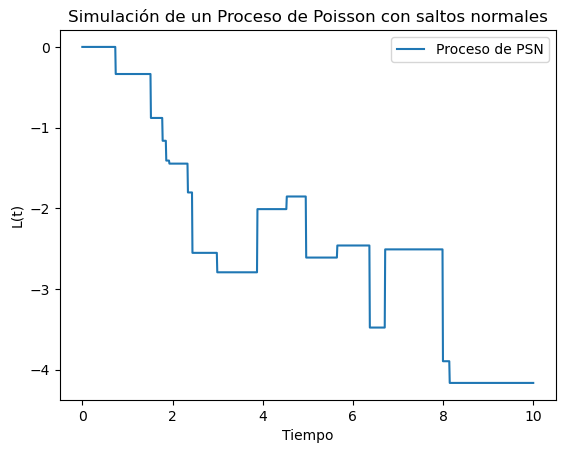

In [32]:
def proceso_salto_poisson(T, N, lambda_, mu, sigma):
    #Proceso con salto poisson
    dt = T / N
    t = np.linspace(0, T, N)
    salto = np.random.poisson(lambda_*dt,N)
    cambio = np.random.normal(mu,sigma, N)
    L = np.cumsum(salto*cambio) #el proceso de levy es la integral hasta t
    return t,L

T = 10  
N = 1000  
lambda_ = 1  
mu = 0  
sigma = 1  


t, L = proceso_salto_poisson(T, N, lambda_, mu, sigma)

plt.plot(t, L, label='Proceso de PSN')
plt.title('Simulación de un Proceso de Poisson con saltos normales')
plt.xlabel('Tiempo')
plt.ylabel('L(t)')
plt.legend()
plt.show()

Las características observables en el gráfico incluyen:

- Saltos discretos: El proceso experimenta cambios abruptos en momentos específicos, lo cual es característico de los procesos de Poisson. Estos saltos representan eventos que ocurren a intervalos aleatorios.
- Tendencia general: A lo largo del tiempo, los saltos pueden acumularse en direcciones positivas o negativas dependiendo de las realizaciones aleatorias de los tamaños de los saltos.

#### Difusión de saltos de Lévy. 

$$
L_t = bt + \sigma W_t + \left( \sum_{k=1}^{N_t} J_k - t \lambda \kappa \right)
$$

donde $ b \in \mathbb{R} $, $ \sigma \in \mathbb{R}_{>0} $, $ W = (W_t)_{0 \leq t \leq T} $ es un movimiento browniano estándar, $N = (N_t)_{0 \leq t \leq T}$ es un proceso de Poisson con parámetro $\lambda $ (es decir, $\mathbb{E}[N_t] = \lambda t$ y $ J = (J_k)_{k \geq 1} $ es una secuencia de variables aleatorias independientes e idénticamente distribuidas (i.i.d.) con distribución de probabilidad $ F $ y $\mathbb{E}[J] = \kappa < \infty$. Por lo tanto, $F$ describe la distribución de los saltos, que llegan según el proceso de Poisson. Todas las fuentes de aleatoriedad son mutuamente independientes.

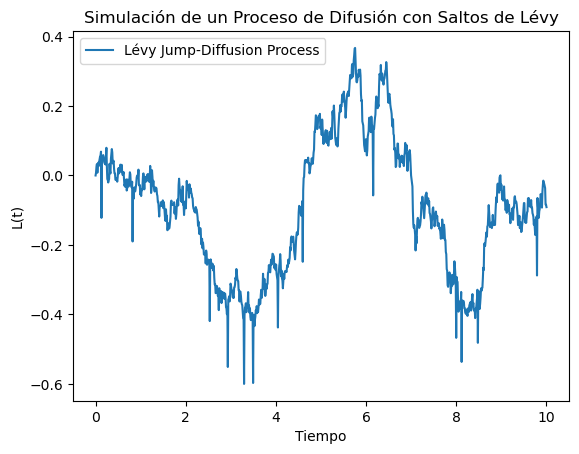

In [40]:
def MBE(paths,points,T):
  mu, sigma = 0.0, 1.0
  rng = np.random.default_rng(1)
  Z = rng.normal(mu, sigma, (paths, points))

  interval = [0.0, T]
  dt = (interval[1] - interval[0]) / (points - 1)
  t_axis = np.linspace(interval[0], interval[1], points)

  W = np.zeros((paths, points))
  for idx in range(points - 1):
      real_idx = idx + 1
      W[:, real_idx] = W[:, real_idx - 1] + np.sqrt(dt) * Z[:, idx]
  return W, t_axis


def simulate_levy_jump_diffusion(T, N, b, sigma, lambda_, mu_J, sigma_J, kappa):
    """
    Simula un proceso de difusión con saltos de Lévy (Lévy jump-diffusion).
    
    Parameters:
    T (float): Tiempo total de simulación.
    N (int): Número de pasos en la simulación.
    b (float): Parámetro de deriva.
    sigma (float): Volatilidad del movimiento browniano.
    lambda_ (float): Tasa del proceso de Poisson.
    mu_J (float): Media de los saltos.
    sigma_J (float): Desviación estándar de los saltos.
    kappa (float): Esperanza de los saltos J.
    
    Returns:
    t (numpy array): Vector de tiempos.
    L (numpy array): Valores del proceso de Lévy en los tiempos t.
    """
    dt = T / N
    t = np.linspace(0, T, N)
    
    # Movimiento browniano
    W,t = MBE(1,N,T)
    W   = W[0]
    # Proceso de Poisson
    N_t = np.random.poisson(lambda_ * dt, N)
    
    # Saltos
    J = np.random.normal(mu_J, sigma_J, N)
    
    # Proceso de Lévy jump-diffusion
    L = np.zeros(N)
    for i in range(1, N):
        sum_J = np.sum(J[:N_t[i]])
        L[i] = b * t[i] + sigma * W[i] + (sum_J - t[i] * lambda_ * kappa)
    
    return t, L

# Parámetros de la simulación
T = 10  # Tiempo total
N = 1000  # Número de pasos
b = 0.1  # Parámetro de deriva
sigma = 0.2  # Volatilidad del movimiento browniano
lambda_ = 1  # Tasa del proceso de Poisson
mu_J = 0  # Media de los saltos
sigma_J = 1  # Desviación estándar de los saltos
kappa = mu_J  # Esperanza de los saltos J (asumimos que es igual a la media)

# Simulación
t, L = simulate_levy_jump_diffusion(T, N, b, sigma, lambda_, mu_J, sigma_J, kappa)

# Graficar el proceso de Lévy
plt.plot(t, L, label='Lévy Jump-Diffusion Process')
plt.title('Simulación de un Proceso de Difusión con Saltos de Lévy')
plt.xlabel('Tiempo')
plt.ylabel('L(t)')
plt.legend()
plt.show()

- Saltos discretos: Se observan saltos abruptos en varios puntos, representando los eventos impulsivos del proceso de Lévy.
- Tendencia a la media: A pesar de las fluctuaciones, el proceso parece oscilar alrededor de la línea base sin una tendencia clara a largo plazo.
- Volatilidad variable: La amplitud de las fluctuaciones no es constante, indicando períodos de alta y baja volatilidad.
- Simetría: El proceso parece tener un comportamiento simétrico en torno a cero, reflejando la naturaleza de los saltos normalmente distribuidos.

### Proceso de Poisson Compensado

El proceso de Poisson $N(t)$ con tasa de llegada $\Theta$ es definido como el número de eventos que ocurren hasta el tiempo $t$. El proceso de Poisson compensado, denotado como $\tilde{N}(t)$, se define de la siguiente manera:

$$\tilde{N}(t) = N(t) - \Theta t $$

donde:
- $N(t)$ es el proceso de Poisson original con tasa $\Theta$.
- $\Theta t$ es el término de compensación que ajusta el proceso para que tenga media cero.


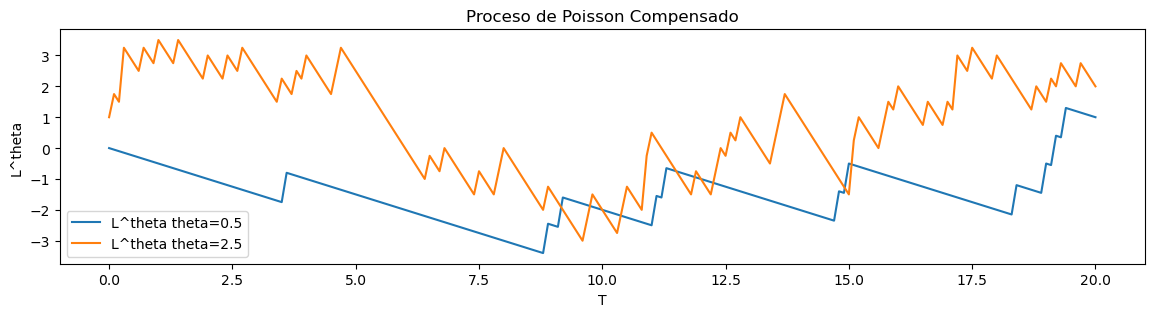

In [43]:
# Parameters
lambda_ = 2.5
X0 = 0
d = 0.35
theta_left = 0.5
theta_right = 2.5
n = 200  # Number of steps
t_max = 20  # Max time
delta_t = t_max / n

# Simulate compensated Poisson processes for left and right theta
def simulate_compensated_poisson(theta, t_max, n):
    delta_t = t_max / n
    times = np.arange(0, t_max + delta_t, delta_t)
    poisson_process = np.cumsum(np.random.poisson(theta * delta_t, size=n + 1))
    compensated_process = poisson_process - theta * times
    return times, compensated_process

times, L_theta_left = simulate_compensated_poisson(theta_left, t_max, n)
_, L_theta_right = simulate_compensated_poisson(theta_right, t_max, n)

plt.figure(figsize=(14, 14))
plt.subplot(4, 1, 1)
plt.plot(times, L_theta_left, label=f'L^theta theta={theta_left}')
plt.plot(times, L_theta_right, label=f'L^theta theta={theta_right}')
plt.title('Proceso de Poisson Compensado')
plt.xlabel('T')
plt.ylabel('L^theta')
plt.legend()


- Comportamiento escalonado: La gráfica muestra un patrón de pasos discontinuos, típico del proceso de Poisson compensado.
- Saltos positivos y negativos: Se observan incrementos y decrementos abruptos, representando los eventos del proceso de Poisson compensado con saltos normales.
- Tendencia general: A lo largo del tiempo, la gráfica puede mostrar una tendencia ascendente, descendente o estacionaria dependiendo de los parámetros de compensación.
- Eventos raros: La frecuencia y la magnitud de los saltos reflejan la naturaleza de los eventos raros modelados por el proceso de Poisson.
- Estabilidad a largo plazo: A pesar de los saltos individuales, el proceso puede mostrar estabilidad general alrededor de un nivel compensado debido al ajuste por la media.

### Proceso de Lévy fraccionario

Se realiza una implementación del proceso de Lévy siguiendo su definición como integral de Riemann. Su aproximación sigue la siguiente definición:

$$
L_t^d \approx \frac{1}{\Gamma(d+1)} \left\{ \sum_{k=-n^2}^{0} \left[ \left(t - \frac{k}{n}\right)^d - \left( -\frac{k}{n}\right)^d \right] \left( L_{(k+1)/n}^{a,b} - L_{k/n}^{a,b} \right) 
+ \sum_{k=1}^{\lfloor nt \rfloor} \left( t - \frac{k}{n} \right)^d \left( L_{(k+1)/n}^{a,b} - L_{k/n}^{a,b} \right) \right\}, \quad t \in \mathbb{R}.
$$


Se muestra una solución a las siguientes EDES, que son procesos Ornstein-Uhlenbeck, utilizando el método de transformación del espacio de estado (SST).  El método de transformación del espacio de estado se utiliza para resolver ecuaciones de la forma:

$$dX_t = \mu(X_t) + \sigma(X_t)dL_t^d$$

Bajo ciertas condiciones, se busca una función $f(x)$ tal que $f(L_t^d)$ es una solución estacionaria para $X_t$. $f(x)$ cumple que

\begin{align*}
f' &= \sigma(f) \\
(f^{-1})' &= 1/\sigma\\
f(X_y)-f(X_s) &= \int_s^t f'(X_u)dX_u
\end{align*}

### Aplicación

Las siguientes ecuaciones describen el comportamiento de los modelos de Cox-Ingersoll-Ross fraccionarios y sus transformaciones naturales en términos de procesos de Lévy fraccionarios:

\begin{equation*}
\mathrm{d}X_t = -\gamma X_t \, \mathrm{d}t + \sigma \sqrt{|X_t|} \, \mathrm{d}L_t^d,
\end{equation*}

donde la función de transformación es:

\begin{equation*}
f(x) = \operatorname{sign}(x) \frac{\sigma^2}{4} x^2,
\end{equation*}

y la segunda ecuación diferencial estocástica es:

\begin{equation*}
\mathrm{d}Y_t = -\lambda \sqrt{Y_t} \log(Y_t) \, \mathrm{d}t + \sigma |Y_t| \, \mathrm{d}L_t^d,
\end{equation*}

con la función de transformación:

\begin{equation*}
g(x) = e^{\sigma x}.
\end{equation*}


I adjusted M from 6000 to 7192 so that m * (M + n) is a power of 2


100%|██████████| 2/2 [00:00<00:00,  2.56it/s]


(1000,)
(1000,)


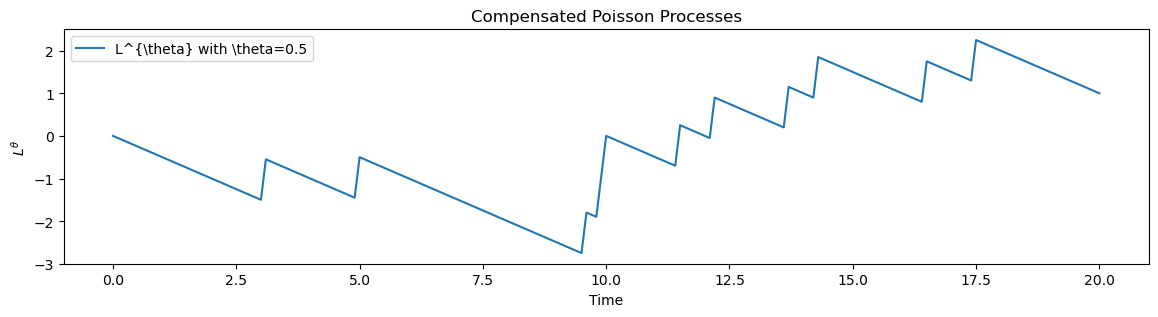

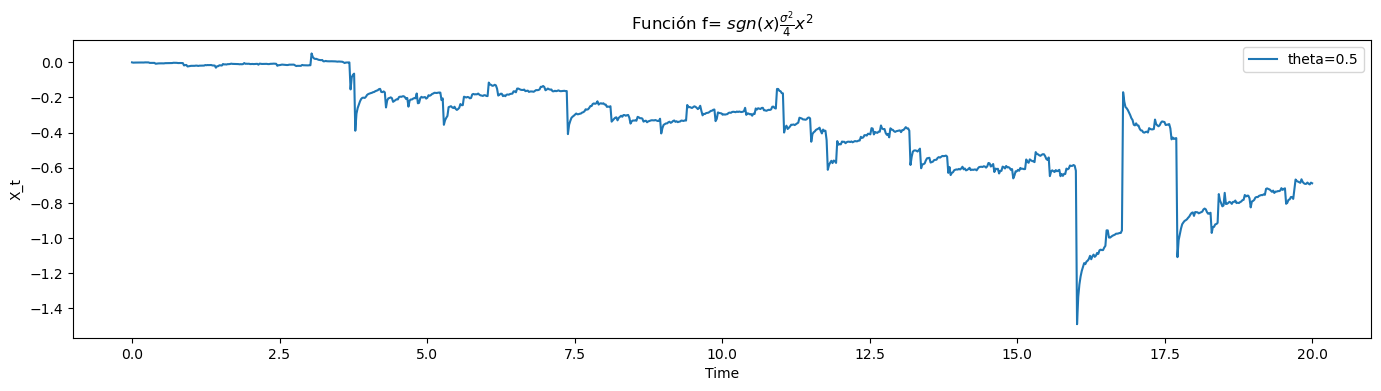

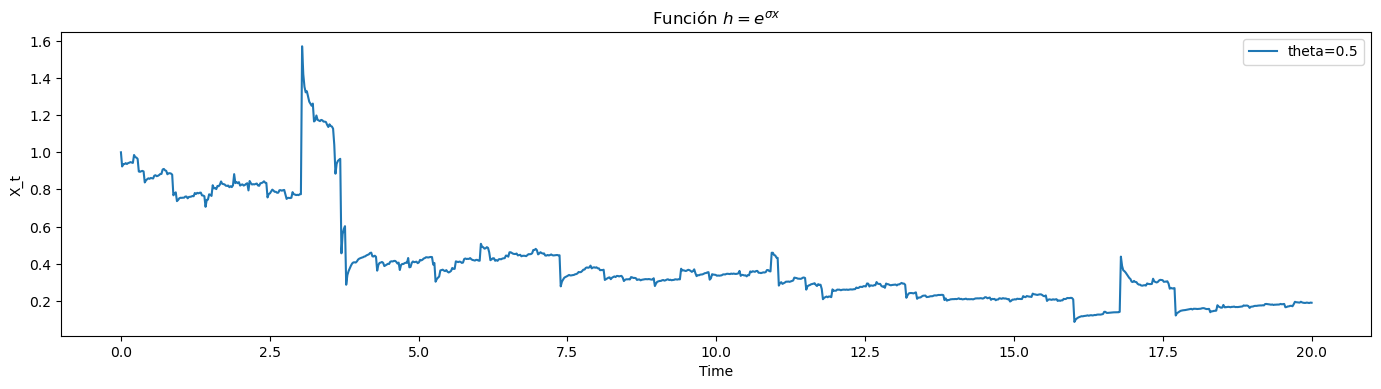

In [41]:
fractional_levy_motion = FLM(1000,d+1/2,1)
fractional_levy_motion.generate_realizations(2)
X_left = fractional_levy_motion.realizations[0, :]/100

times = np.linspace(0,20,1000)
print(times.shape)

print(X_left.shape)
def f(x, sigma_squared):
    return np.sign(x) * (sigma_squared / 4) * x ** 2

def g(x, sigma):
    return (sigma* x)**2
def h(x,sigma):
    return np.exp(sigma*x)


sigma_squared = 1

f_X_left = f(X_left, sigma_squared)

g_X_left = g(X_left, sigma_squared)

h_X_left = h(X_left, sigma_squared)

plt.figure(figsize=(14, 14))
plt.subplot(4, 1, 1)
plt.plot(np.linspace(0,20,201), L_theta_left, label=r'L^{\theta} with \theta=0.5')

plt.title(r'Compensated Poisson Processes')
plt.xlabel('Time')
plt.ylabel(r'$L^{\theta}$')
plt.legend()


# Plot the results
plt.figure(figsize=(14, 14))


plt.subplot(4, 1, 4)
plt.plot(times, f_X_left, label=f'theta={theta_left}')

plt.title(r'Función f= $sgn(x)\frac{\sigma^2}{4}x^2$')
plt.xlabel('Time')
plt.ylabel(r'X_t')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 14))
plt.subplot(4, 1, 4)
plt.plot(times, h_X_left, label=f'theta={theta_left}')
# plt.plot(times, h_X_right, label=f'theta={theta_right}')
plt.title(r'Función $h=e^{\sigma x}$')
plt.xlabel('Time')
plt.ylabel('X_t')
plt.legend()

plt.tight_layout()
plt.show()

## Conclusiones

1. **Modelado de fenómenos con cambios abruptos**: La generalización de los procesos de Lévy permite que fenómenos con cambios abruptos, como los fenómenos bursátiles, sean modelados con mayor exactitud. Esto se debe a la influencia del proceso de Poisson subyacente, que captura la naturaleza discreta y los saltos inesperados presentes en los mercados financieros. La capacidad de incorporar saltos de tamaño variable en la simulación proporciona una herramienta poderosa para la evaluación de riesgos y la toma de decisiones en finanzas.

2. **Aproximación computacional del proceso fraccionario de Lévy**: La definición del proceso fraccionario de Lévy se hace comprensible, computacionalmente, a través de su representación como una integral de Riemann. Sin embargo, la aproximación al proceso mediante la integral de Riemann-Stieltjes resulta muy difícil. La falta de soluciones exactas complica la realización de pruebas que validen las implementaciones. A pesar de estos desafíos, las simulaciones permiten aproximarse a comportamientos que serían complejos de modelar con técnicas tradicionales, aunque la validación rigurosa sigue siendo un área pendiente de desarrollo.

3. **Eficiencia de las soluciones planteadas**: El proceso de solución planteado en este trabajo nos permite evadir los errores de aproximación del método de Euler. Aunque las condiciones para utilizar la transformación SST son estrictas, es mucho más eficiente resolver los procesos FLOUP a través de transformaciones que de aproximaciones numéricas directas. Estas transformaciones simplifican significativamente la implementación computacional, haciendo que las simulaciones sean más rápidas y precisas, lo cual es crucial para aplicaciones prácticas donde la eficiencia y la precisión son esenciales.

### Referencias

 Fractional Lévy-driven Ornstein–Uhlenbeck
 processes and stochastic differential
 equations 